## Separa os dados de treino e teste, treina o modelo e faz a predição do preço da cenoura

In [85]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
# carrega arquivos limpos e tratados
iax = pd.read_csv('arquivos_tratados/iaxN.csv')
vaaax = pd.read_csv('arquivos_tratados/vaaaxN.csv')

In [87]:
# verifica os tipos de variáveis, não será usado a data_med
print(iax.info())
print(vaaax.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp_max              39 non-null     float64
 1   precipitação_mm       39 non-null     float64
 2   Preço_kg_orig         39 non-null     float64
 3   temp_max_orig         39 non-null     float64
 4   precipitação_mm_orig  39 non-null     float64
 5   Preço_kg              39 non-null     float64
 6   data_med              39 non-null     object 
dtypes: float64(6), object(1)
memory usage: 2.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Preço_kg              36 non-null     float64
 1   precipitação_mm       36 non-null     float64
 2   temp_max              36 non-null     float64
 3   data_med            

In [88]:
# separa o modelo em treino e teste
from sklearn.model_selection import train_test_split

Xi = iax[['temp_max','precipitação_mm']]
#Xi = iax[['temp_max']]
yi = iax.Preço_kg

Xv = iax[['temp_max','precipitação_mm']]
#Xv = iax[['temp_max']]
yv = iax.Preço_kg

Xvv = vaaax[['temp_max','precipitação_mm']]
#Xv = vaaax[['temp_max']]
yvv = vaaax.Preço_kg

In [89]:
# visualiza x e y de inverno e verão
print('inverno A')
print(Xi.head(5))
print(yi.head(5))

print(' ')
print('verão AAA')
print(Xvv.head(5))
print(yvv.head(5))

inverno A
   temp_max  precipitação_mm
0  0.230769         0.000000
1  0.076923         0.000000
2  0.076923         0.000000
3  0.365385         0.000000
4  0.115385         0.066752
0    1.54
1    1.54
2    1.48
3    1.34
4    1.10
Name: Preço_kg, dtype: float64
 
verão AAA
   temp_max  precipitação_mm
0  0.649351         0.618794
1  0.519481         1.000000
2  0.662338         0.593972
3  0.545455         0.735816
4  0.662338         0.285461
0    2.93
1    2.93
2    2.93
3    2.97
4    4.17
Name: Preço_kg, dtype: float64


In [90]:
# treina modelos de inverno e verão
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.25, train_size=0.70, random_state=42)
Xv_train, Xv_test, yv_train, yv_test = train_test_split(Xv, yv, test_size=0.25, train_size=0.70, random_state=41)

## Regressão Linear Simples

- Usando dados de cenoura inverno A e cenoura verão AAA

In [91]:
# Faz a regressão e o fit com os dados
from sklearn.linear_model import LinearRegression

regi_temp_max = LinearRegression().fit(Xi_train.temp_max.values.reshape(-1,1), yi_train)
regi_precipitação_mm = LinearRegression().fit(Xi_train.precipitação_mm.values.reshape(-1,1), yi_train)

regv_temp_max = LinearRegression().fit(Xv_train.temp_max.values.reshape(-1,1), yv_train)
regv_precipitação_mm = LinearRegression().fit(Xv_train.precipitação_mm.values.reshape(-1,1), yv_train)

In [92]:
# Verifica o coeficiente de determinação
print('temp_max - inverno')
print(regi_temp_max.score(Xi_train.temp_max.values.reshape(-1,1), yi_train))
print(regi_temp_max.score(Xi_test.temp_max.values.reshape(-1,1), yi_test))
 
print(' ')
print('precipitação_mm - inverno')
print(regi_precipitação_mm.score(Xi_train.precipitação_mm.values.reshape(-1,1), yi_train))
print(regi_precipitação_mm.score(Xi_test.precipitação_mm.values.reshape(-1,1), yi_test))
 
print(' ')
print('temp_max - verão')
print(regv_temp_max.score(Xv_train.temp_max.values.reshape(-1,1), yv_train))
print(regv_temp_max.score(Xv_test.temp_max.values.reshape(-1,1), yv_test))
 
print(' ')
print('precipitação_mm - verão')
print(regv_precipitação_mm.score(Xv_train.precipitação_mm.values.reshape(-1,1), yv_train))
print(regv_precipitação_mm.score(Xv_test.precipitação_mm.values.reshape(-1,1), yv_test))
 

temp_max - inverno
0.17295002895112555
-0.04930388334132996
 
precipitação_mm - inverno
0.19853970789345476
-1.0588744108342425
 
temp_max - verão
0.10698058462821447
0.25553615269635543
 
precipitação_mm - verão
0.005393755989645532
-0.00033812888668482977


- Avaliando os Modelos de inverno e verão

In [93]:
# Fazendo o predict para temp_max e precipitação_mm
yi_pred1 = regi_temp_max.predict(Xi_test.temp_max.values.reshape(-1,1))
yi_pred2 = regi_precipitação_mm.predict(Xi_test.precipitação_mm.values.reshape(-1,1))

yv_pred1 = regv_temp_max.predict(Xv_test.temp_max.values.reshape(-1,1))
yv_pred2 = regv_precipitação_mm.predict(Xv_test.precipitação_mm.values.reshape(-1,1))

In [94]:
# Avaliando o erro médio absoluto dos dados de TESTE
# Avaliando o erro quadrático médio para os dados de TESTE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('erro médio absoluto - inverno A - temperatura')
print(mean_absolute_error(yi_test, yi_pred1))
 
print('erro quadrático médio - inverno A - temperatura')
print(mean_squared_error(yi_test,yi_pred1))
 
print(' ')
print('erro médio absoluto - inverno A - precipitação')
print(mean_absolute_error(yi_test, yi_pred2))
#print(' ')
print('erro quadrático médio - inverno A - precipitação')
print(mean_squared_error(yi_test,yi_pred2))
 
print(' ')
print('erro médio absoluto - verão AAA - temperatura')
print(mean_absolute_error(yv_test, yv_pred1))
 
print('erro quadrático médio - verão AAA - temperatura')
print(mean_squared_error(yv_test,yv_pred1))
 
print(' ')
print('erro médio absoluto - verão AAA - precipitação')
print(mean_absolute_error(yv_test, yv_pred2))
#print(' ')
print('erro quadrático médio - verão AAA - precipitação')
print(mean_squared_error(yv_test,yv_pred2))
 

erro médio absoluto - inverno A - temperatura
0.2956992843211441
erro quadrático médio - inverno A - temperatura
0.13615872120625433
 
erro médio absoluto - inverno A - precipitação
0.38989887125018863
erro quadrático médio - inverno A - precipitação
0.2671616024242621
 
erro médio absoluto - verão AAA - temperatura
0.23541099334852347
erro quadrático médio - verão AAA - temperatura
0.07818359324382874
 
erro médio absoluto - verão AAA - precipitação
0.2858234572154515
erro quadrático médio - verão AAA - precipitação
0.10505551029567961


## Árvore de Regressão

In [95]:
# Importa as bibliotecas
from sklearn import tree
from sklearn.metrics import r2_score


In [96]:
# Cria o regressor
ri = tree.DecisionTreeRegressor(random_state=42)
rv = tree.DecisionTreeRegressor(random_state=41)

In [97]:
# Faz o fit
regi_Arvore = ri.fit(Xi_train, yi_train)
regv_Arvore = ri.fit(Xv_train, yv_train)

In [98]:
# Avalia o modelo
yi_predArvore = regi_Arvore.predict(Xi_test)
yv_predArvore = regv_Arvore.predict(Xv_test)

print('coeficiente de determinação da previsão - inverno A')
print(regi_Arvore.score(Xi_test, yi_test))
print(r2_score(yi_test, yi_predArvore))
print('erro médio absoluto e quadrático - inverno A')
print(mean_absolute_error(yi_test, yi_predArvore))
print(mean_squared_error(yi_test,yi_predArvore)) 

print(' ')
print('coeficiente de determinação da previsão - verão AAA')
print(regv_Arvore.score(Xv_test, yv_test))
print(r2_score(yv_test, yv_predArvore))
print('erro médio absoluto e quadrático - verão AAA')
print(mean_absolute_error(yv_test, yv_predArvore))
print(mean_squared_error(yv_test,yv_predArvore)) 

coeficiente de determinação da previsão - inverno A
0.8473154491719393
0.8473154491719393
erro médio absoluto e quadrático - inverno A
0.07449999999999997
0.01981249999999998
 
coeficiente de determinação da previsão - verão AAA
0.37688059417253883
0.37688059417253883
erro médio absoluto e quadrático - verão AAA
0.22599999999999992
0.06543999999999997


## SVR

In [99]:
# Importa o SVR
from sklearn import svm

In [100]:
# Cria o regressor
regSVR = svm.SVR()

In [101]:
# Faz o fit
regi_SVR = regSVR.fit(Xi_train, yi_train)
regv_SVR = regSVR.fit(Xv_train, yv_train)

In [102]:
# Avalia o modelo
yi_predSVR = regi_SVR.predict(Xi_test)
yv_predSVR = regv_SVR.predict(Xv_test)

print('coeficiente de determinação da previsão - inverno A')
print(regSVR.score(Xi_test, yi_test))
print(r2_score(yi_test, yi_predSVR, multioutput='variance_weighted'))
print('erro médio absoluto e quadrático - inverno A')
print(mean_absolute_error(yi_test, yi_predSVR))
print(mean_squared_error(yi_test,yi_predSVR))

print(' ')
print('coeficiente de determinação da previsão - verão AAA')
print(regSVR.score(Xv_test, yv_test))
print(r2_score(yv_test, yv_predSVR, multioutput='variance_weighted'))
print('erro médio absoluto e quadrático - verão AAA')
print(mean_absolute_error(yv_test, yv_predSVR))
print(mean_squared_error(yv_test,yv_predSVR))

coeficiente de determinação da previsão - inverno A
0.7742520507273218
0.774252050727322
erro médio absoluto e quadrático - inverno A
0.15243085841799658
0.029293279645571997
 
coeficiente de determinação da previsão - verão AAA
0.6456418693329116
0.6456418693329116
erro médio absoluto e quadrático - verão AAA
0.15288476375023485
0.03721469088265762


## Visualiza as Informações

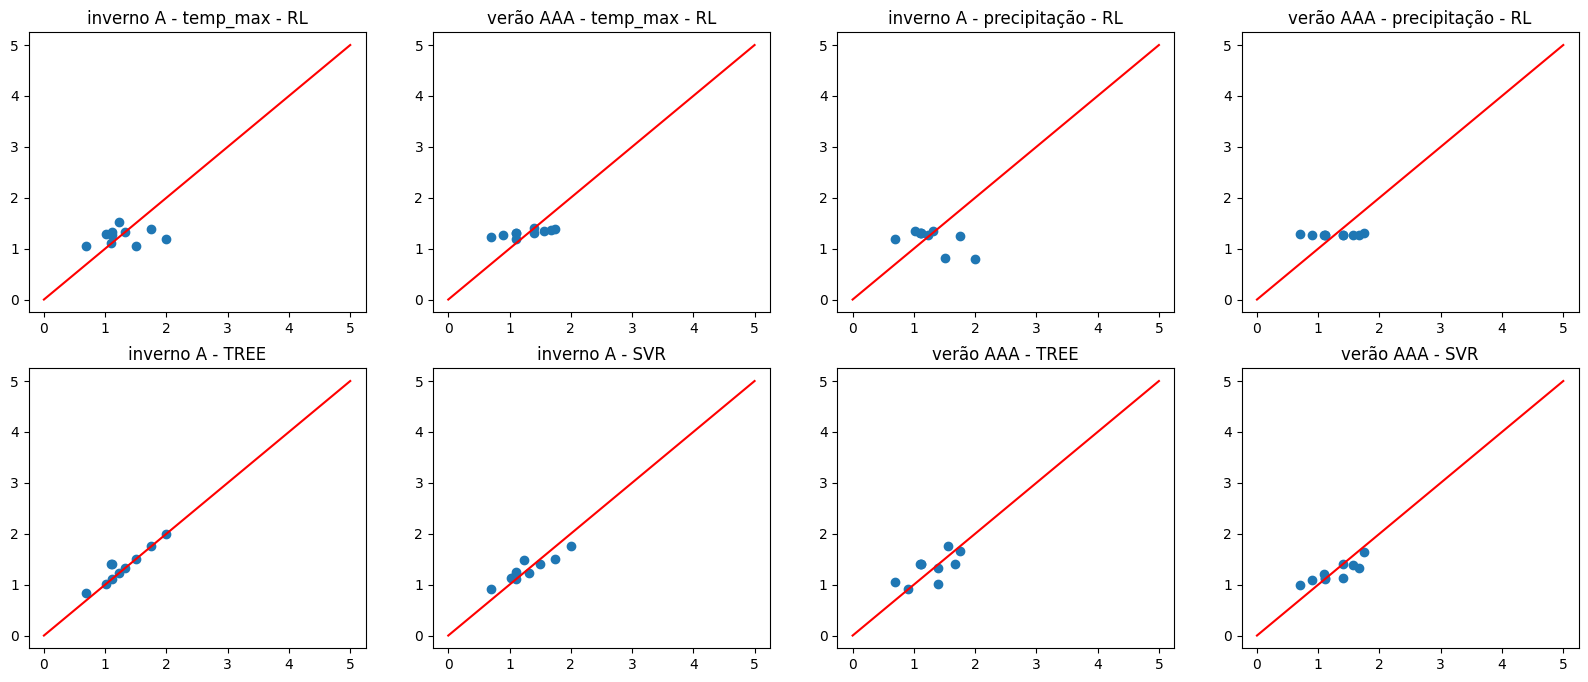

In [103]:
# Plota gráficos de regressão linear dos testes
import numpy as np
fig,ax = plt.subplots(nrows=2,ncols=4,figsize=(20,8))

x = np.arange(0,6)
y = x
ax[0,0].scatter(yi_test,yi_pred1)
ax[0,0].plot(x,y,'r')
ax[0,0].set_title('inverno A - temp_max - RL')
ax[0,1].scatter(yv_test,yv_pred1)
ax[0,1].plot(x,y,'r')
ax[0,1].set_title('verão AAA - temp_max - RL')

ax[0,2].scatter(yi_test,yi_pred2)
ax[0,2].plot(x,y,'r')
ax[0,2].set_title('inverno A - precipitação - RL')
ax[0,3].scatter(yv_test,yv_pred2)
ax[0,3].plot(x,y,'r')
ax[0,3].set_title('verão AAA - precipitação - RL')

ax[1,0].scatter(yi_test,yi_predArvore)
ax[1,0].plot(x,y,'r')
ax[1,0].set_title('inverno A - TREE')
ax[1,1].scatter(yi_test,yi_predSVR)
ax[1,1].plot(x,y,'r')
ax[1,1].set_title('inverno A - SVR')

ax[1,2].scatter(yv_test,yv_predArvore)
ax[1,2].plot(x,y,'r')
ax[1,2].set_title('verão AAA - TREE')
ax[1,3].scatter(yv_test,yv_predSVR)
ax[1,3].plot(x,y,'r')
ax[1,3].set_title('verão AAA - SVR')

plt.show()

In [104]:
# os valores que mais se adequaram conforme os gráficos de regressão anteriores foram 
# inverno A - TREE e verão AAA - TREE, juntamente com os coeficientes de determinação e os erros médios
# absolutos e quadráticos
preços_verão_svr = pd.DataFrame(yv_predSVR)
preços_verão_svr.columns = ['Preço_kg_Cenoura_prev']
print ('verão AAA')
print (preços_verão_svr.sort_values(by='Preço_kg_Cenoura_prev', ascending=False).head(5))

print(' ')
print ('inverno A')
preços_inverno_tree = pd.DataFrame(yi_predArvore)
preços_inverno_tree.columns = ['Preço_kg_Cenoura_prev']
print(preços_inverno_tree.sort_values(by='Preço_kg_Cenoura_prev', ascending=False).head(5))

verão AAA
   Preço_kg_Cenoura_prev
0               1.642435
2               1.402094
5               1.380169
3               1.334068
9               1.213304
 
inverno A
   Preço_kg_Cenoura_prev
7                   2.00
4                   1.75
5                   1.50
2                   1.40
9                   1.40


## Faz o Deploy dos Modelos

In [105]:
# os modelos que tiveram melhor resultado foram
from joblib import dump

dump(regi_Arvore, 'modelos/mod_invernoA_rtree.joblib')
dump(regv_Arvore, 'modelos/mod_verãoAAA_rtree.joblib')

['modelos/mod_verãoAAA_rtree.joblib']